In [16]:
import pandas as pd
import numpy as np
from statsbombpy import sb
import seaborn as sns
import mplsoccer
import matplotlib.pyplot as plt
import matplotlib
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [17]:
t=sb.matches(competition_id=43,season_id=3)

In [18]:
t=t[t['competition_stage']=='Round of 16']

In [19]:
df=sb.events(match_id=7580)

In [20]:
df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part',
       'pass_cross', 'pass_deflected', 'pass_end_location', 'pass_goal_assist',
       'pass_height', 'pass_length', 'pass_miscommunication', 'pass_outcome'

In [21]:
df = df[['type','minute','second','location','player']]
df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Foul Committed', 'Foul Won', 'Ball Recovery', 'Pressure',
       'Camera On', 'Dispossessed', 'Duel', 'Interception', 'Clearance',
       'Block', 'Miscontrol', 'Dribbled Past', 'Dribble', 'Shot',
       'Goal Keeper', 'Player Off', 'Player On', 'Camera off',
       'Injury Stoppage', 'Half End', 'Substitution', 'Bad Behaviour',
       'Error', '50/50', 'Tactical Shift'], dtype=object)

In [22]:
df = df[df['player']=='Kylian Mbappé Lottin']

In [23]:
df = df[(df['type']=='Pass')|(df['type']=='Shot')|(df['type']=='Carry')|(df['type']=='Dribble')]

In [24]:
l=[]
l1=[]
for i in df['location']:
    l.append(i[0])
    l1.append(i[1])
df['x']=l
df['y']=l1
df.drop('location',axis=1,inplace=True)

In [25]:
customcmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom cmap',['black','red'])

<AxesSubplot:>

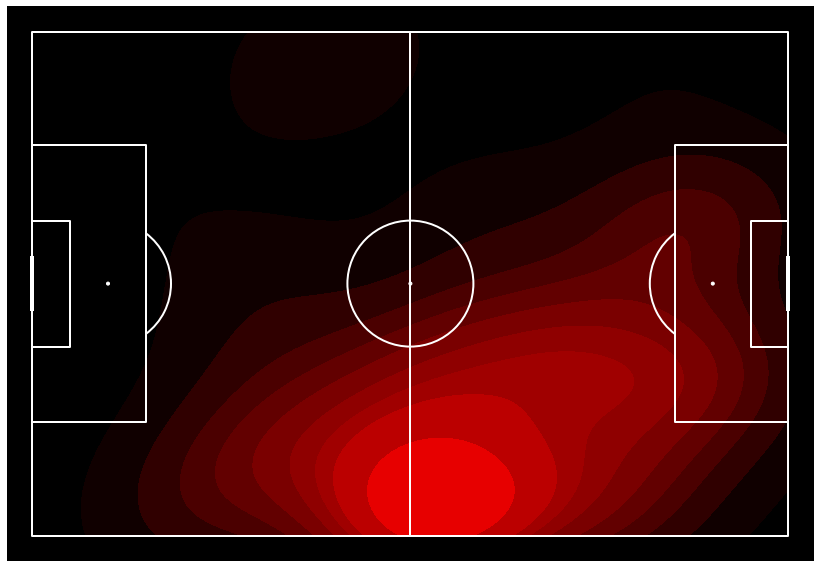

In [26]:
pitch = mplsoccer.pitch.Pitch(pitch_color='black',line_color='white',line_zorder=2)
fig,ax = pitch.draw(figsize=(13,8))
pitch.kdeplot(df['x'],df['y'],ax=ax,cmap=customcmap,shade=True,n_levels=10,zorder=1)